In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Получить статтистику по диням
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных компаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

In [3]:
ads_data = pd.read_csv('C:\\Users\\Omar\\Desktop\\Дата аналитик\\Python\\lesson5_p_tables\\ads_data.csv')

In [102]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [103]:
ads_data['date'] =pd.to_datetime(ads_data['date'])

In [104]:
ads_data['time'] =pd.to_datetime(ads_data['time'])

In [105]:
ads_data.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

<Axes: xlabel='date'>

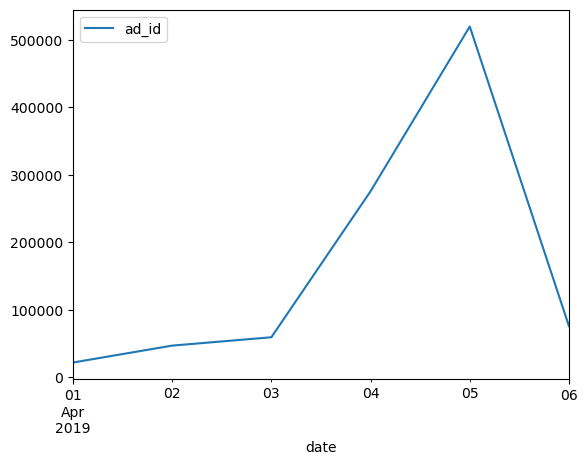

In [106]:
ads_data.groupby('date')\
    .agg({'ad_id':'count'}).plot()

In [107]:
ads_data.groupby(['date','event'], as_index=False)\
    .agg({'ad_id':'count'})\
    .pivot(index='date', columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,291,21782
1,2019-04-02,545,46572
2,2019-04-03,460,59023
3,2019-04-04,643,275092
4,2019-04-05,92321,427386
5,2019-04-06,14918,60967


In [108]:
ads_data[ads_data.date == '2019-04-05']\
    .groupby('ad_id')\
    .agg({'time':'count'})\
    .sort_values('time', ascending=False)

,time
ad_id,
112583,393828
107729,29745
28142,20903
38892,8437
107837,8341
...,...
45969,1
10705,1
117213,1


In [109]:
ad_id = '112583'

In [110]:
ads_data.query('ad_id == 112583')\
    .groupby('date')\
    .agg({'time':'count'})

,time
date,
2019-04-05,393828
2019-04-06,63741


In [111]:
ads_data.query('ad_id == 112583').head(1)

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
120248,2019-04-05,2019-04-05 00:00:05,view,ios,112583,111818,112260,CPM,210.1,0,22392


In [112]:
ads_data.groupby('date', as_index=False)\
    .agg({'ad_id':pd.Series.nunique})

,date,ad_id
0,2019-04-01,150
1,2019-04-02,344
2,2019-04-03,360
3,2019-04-04,407
4,2019-04-05,465
5,2019-04-06,220


In [113]:
ads_data.groupby('date', as_index=False)\
    .agg({'campaign_union_id':pd.Series.nunique})

,date,campaign_union_id
0,2019-04-01,149
1,2019-04-02,336
2,2019-04-03,352
3,2019-04-04,396
4,2019-04-05,442
5,2019-04-06,212


In [114]:
# Найти топ 10 обЪявлений по CTR за все время. CTR -это отношение всех просмотров объявления к кликам. 
# Наптрмер, если у объявления было 100 показов и 2 клика, CTR = 0.02.
# Различается ли средный и медианный CTR обнавлений в наших данных.

In [1]:
ads_data_by_id = ads_data.groupby(['ad_id','event'], as_index=False)\
    .agg({'time':'count'})\
    .pivot(index='ad_id', columns='event', values='time').reset_index()

NameError: name 'ads_data' is not defined

In [119]:
ads_data_by_id

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,NaN,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,NaN,156.0
962,122023,NaN,68.0
963,122031,1.0,138.0


In [123]:
ads_data_by_id = ads_data_by_id.assign(ctr=ads_data_by_id.click /ads_data_by_id.view, ctr_per = 100 * ads_data_by_id.click/ads_data_by_id.view)

In [124]:
ads_data_by_id.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
873,117164,6.0,19.0,0.315789,31.578947
787,112583,105767.0,351802.0,0.300644,30.064354
463,42507,3.0,11.0,0.272727,27.272727
665,98569,3.0,16.0,0.187500,18.750000
621,46639,44.0,253.0,0.173913,17.391304
174,23599,4.0,24.0,0.166667,16.666667
126,19912,4.0,25.0,0.160000,16.000000
756,110414,5.0,32.0,0.156250,15.625000
593,45969,2.0,13.0,0.153846,15.384615
136,20662,4.0,26.0,0.153846,15.384615


C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


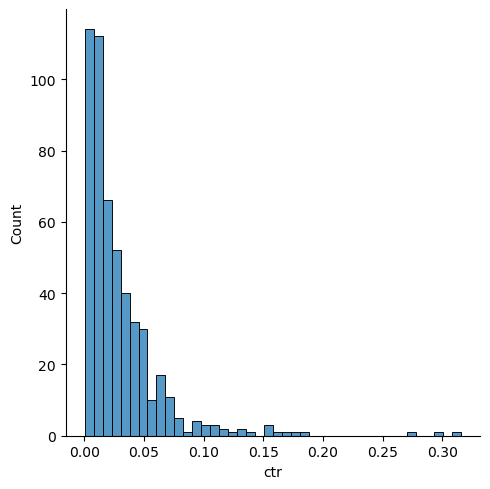

In [125]:
sns.displot(ads_data_by_id.ctr, kde=False)

In [126]:
ads_data_by_id.ctr.median()

0.018265221017514596

In [127]:
ads_data_by_id.ctr.mean()

0.029341727343227063

In [128]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов!
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [158]:
ads_data_by_id = ads_data_by_id.fillna(0)

In [168]:
ads_data_bugs = ads_data_by_id.query('click == 0').ad_id

In [170]:
ads_data_bugs.shape

(440,)

In [177]:
ads_data[ads_data.ad_id.isin(ads_data_bugs)]\
    .groupby('platform', as_index=False)\
    .agg({'ad_id':'count'})\
    .sort_values('ad_id')

,platform,ad_id
2,web,9263
1,ios,14187
0,android,23099


In [167]:
ads_data\
    .groupby('platform', as_index=False)\
    .agg({'ad_id':'count'})\
    .sort_values('ad_id')

,platform,ad_id
2,web,199665
1,ios,299979
0,android,500356


In [ ]:
# Есть ли различия в CTR у объвлений с видео и без? А чему равняется 95 процентиль CTR по всем обявлениям за 2019 -04 -04?

In [181]:
df_2019_04_04 = ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id','event'], as_index=False)\
    .agg({'time':'count'})\
    .pivot(index='ad_id', columns='event', values='time').reset_index()\
    .fillna(0)

In [183]:
df_2019_04_04['ctr'] = df_2019_04_04.click /df_2019_04_04.view

In [189]:
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)

0.16666666666666666

In [227]:
df_has_video = ads_data.groupby(['ad_id','event','has_video'], as_index=False)\
    .agg({'time':'count'})\
    .pivot(index=['ad_id','has_video'], columns='event', values='time').reset_index()\
    .fillna(0)

In [228]:
df_has_video['ctr'] = df_has_video.click /df_has_video.view

<Axes: >

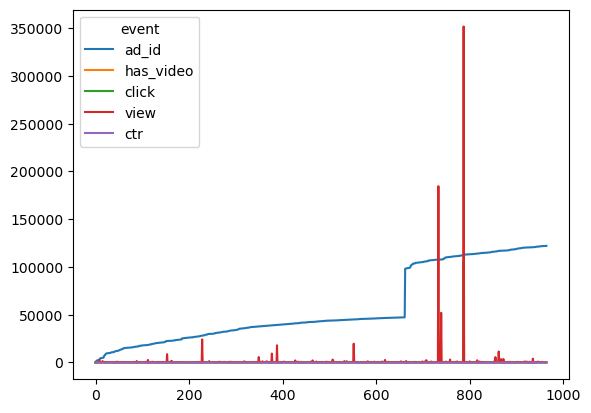

In [233]:
df_has_video[df_has_video.has_video == 0].plot()

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


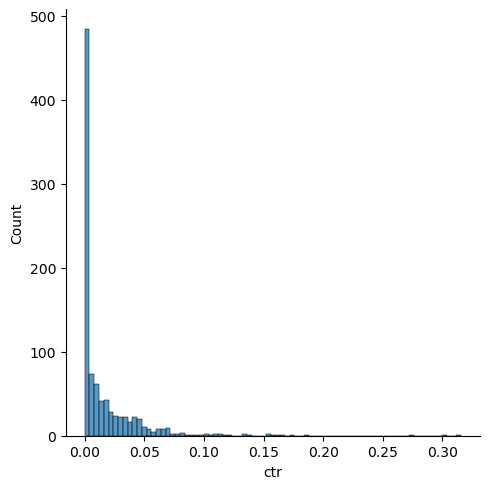

In [236]:
sns.displot(df_has_video[df_has_video.has_video == 0].ctr, kde=False)

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


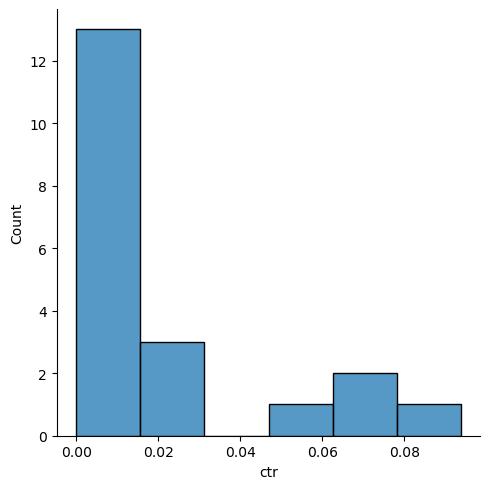

In [237]:
sns.displot(df_has_video[df_has_video.has_video == 1].ctr, kde=False)

In [238]:
# Для финансового отчета нужно рассчтитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произашел клик по CPC объявлению
# и мы списываем деньги за каждый показ по CPM обявления, если у 
# CPM овновления цена 200 рублей, то мы зарабатываем за один показ 200/1000

In [241]:
ads_data[(ads_data.ad_cost_type == 'CPC')&(ads_data.event == 'click')].ad_cost.sum()

27311.3

In [243]:
ads_data[(ads_data.ad_cost_type == 'CPM')&(ads_data.event == 'view')].ad_cost.sum()/1000

171235.0079

In [244]:
# А Есть ли какие обявления, по которым сначала произошел клик, а только потом показ?

In [257]:
ads_data.groupby(['ad_id','event'], as_index=False)\
    .agg({'time':'min'})\
    .pivot(index='ad_id', columns='event', values='time').reset_index()\
    .query('click < view')

event,ad_id,click,view
115,18681,2019-04-05 00:18:20,2019-04-05 02:45:35
174,23599,2019-04-05 00:05:26,2019-04-05 05:48:26
281,32386,2019-04-03 00:03:23,2019-04-03 00:03:25
285,33033,2019-04-05 00:10:28,2019-04-05 03:33:11
329,36758,2019-04-04 01:21:18,2019-04-04 01:23:42
359,38224,2019-04-04 00:02:30,2019-04-04 00:09:24
522,44283,2019-04-04 00:09:24,2019-04-04 00:11:36
539,44766,2019-04-05 00:54:49,2019-04-05 02:02:57
621,46639,2019-04-02 00:01:55,2019-04-02 00:02:06
665,98569,2019-04-04 03:09:35,2019-04-04 07:55:00


In [258]:
# Какая платформа самая популярная для размещения рекламных объвялений? 
# Сколько процентов показов приходитя на каждую из платформ(колонка Platform)

In [5]:
ads_data.groupby('platform', as_index=False)\
    .agg({'ad_id':'sum'})

,platform,ad_id
0,android,47310072350
1,ios,28339668547
2,web,18871898705


In [13]:
ads_data_platform = ads_data[ads_data.event == 'view'].groupby('platform', as_index=False)\
    .agg({'event':'count'})


In [16]:
ads_data_platform['per_platform'] =(100* ads_data_platform.event /ads_data_platform.event.sum()).round(2)

In [17]:
ads_data_platform

,platform,event,per_platform
0,android,445722,50.03
1,ios,267117,29.99
2,web,177983,19.98
